Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

In [2]:
df = pd.read_csv('my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df.shape

(10, 15)

In [5]:
df = df.iloc[:, 6:]
df

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gladiator      10 non-null     int64
 1   LOTR1          10 non-null     int64
 2   Harry Potter1  10 non-null     int64
 3   Patriot        10 non-null     int64
 4   LOTR2          10 non-null     int64
 5   Harry Potter2  10 non-null     int64
 6   LOTR           10 non-null     int64
 7   Braveheart     10 non-null     int64
 8   Green Mile     10 non-null     int64
dtypes: int64(9)
memory usage: 848.0 bytes


## Support = 10%, Confidence=20%

In [7]:
freq_items = apriori(df, min_support=0.1, use_colnames=True)
freq_items

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.1,(Harry Potter2)
6,0.1,(LOTR)
7,0.1,(Braveheart)
8,0.2,(Green Mile)
9,0.6,"(Gladiator, Patriot)"


In [13]:
model = association_rules(freq_items, metric='confidence', min_threshold=0.2)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
3,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.6
...,...,...,...,...,...,...,...,...,...
63,"(LOTR2, LOTR1)","(Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64,(Harry Potter1),"(LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
65,(Green Mile),"(Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
66,(LOTR1),"(Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


<AxesSubplot:xlabel='support', ylabel='confidence'>

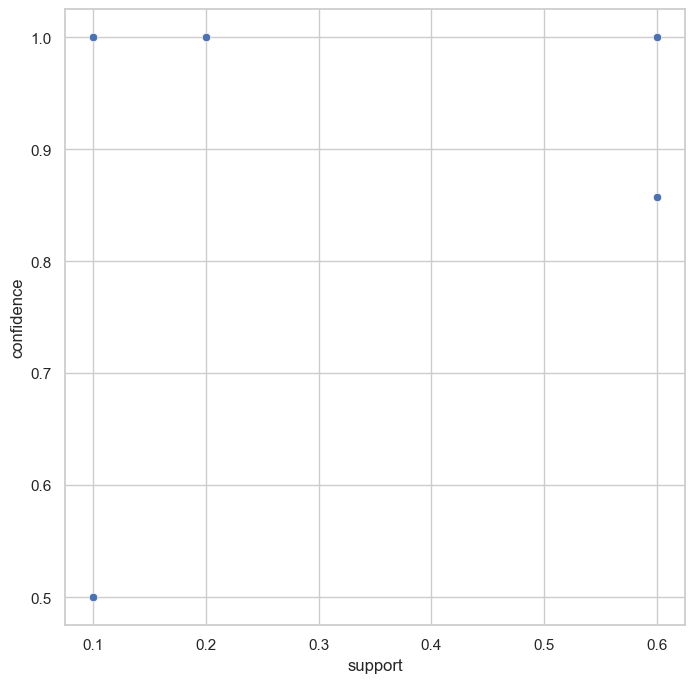

In [18]:
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.scatterplot(x=model['support'], y=model['confidence'])

## Support = 10%, Confidence=50%

In [19]:
freq_items = apriori(df, min_support=0.1, use_colnames=True)
freq_items

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.1,(Harry Potter2)
6,0.1,(LOTR)
7,0.1,(Braveheart)
8,0.2,(Green Mile)
9,0.6,"(Gladiator, Patriot)"


In [20]:
model = association_rules(freq_items, metric='confidence', min_threshold=0.5)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
3,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.6
...,...,...,...,...,...,...,...,...,...
63,"(LOTR2, LOTR1)","(Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64,(Harry Potter1),"(LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
65,(Green Mile),"(Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
66,(LOTR1),"(Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


<AxesSubplot:xlabel='support', ylabel='confidence'>

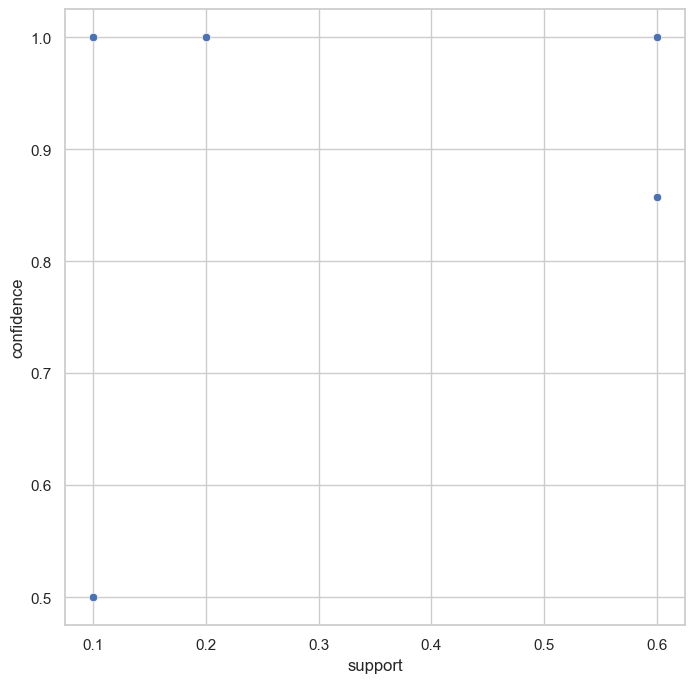

In [22]:
sns.scatterplot(x=model['support'], y=model['confidence'])

## Support = 10%, Confidence=80%

In [23]:
model = association_rules(freq_items, metric='confidence', min_threshold=0.8)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
3,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
7,(Braveheart),(Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
8,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
9,"(Gladiator, Braveheart)",(Patriot),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


<AxesSubplot:xlabel='support', ylabel='confidence'>

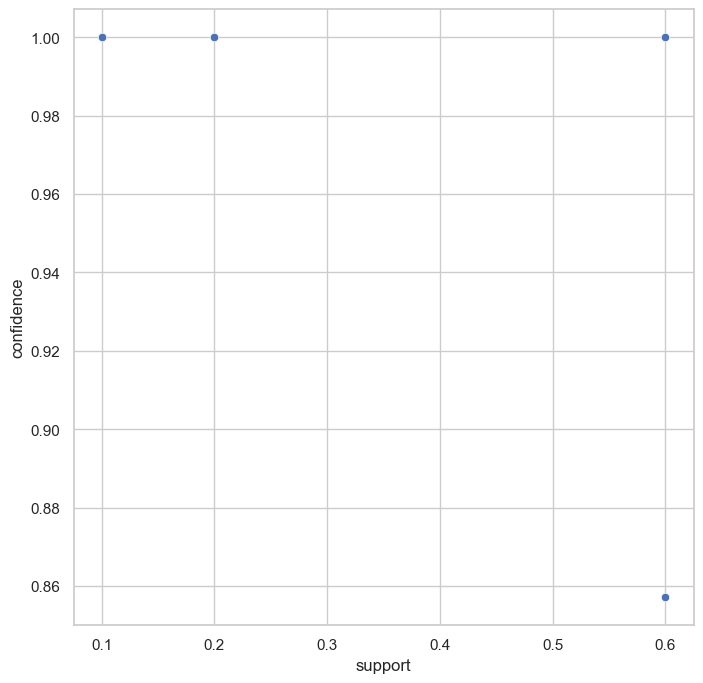

In [24]:
sns.scatterplot(x=model['support'], y=model['confidence'])

## Support = 20%, Confidence=20%

In [25]:
freq_items = apriori(df, min_support=0.2, use_colnames=True)
freq_items

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.2,(Green Mile)
6,0.6,"(Gladiator, Patriot)"
7,0.2,"(LOTR2, LOTR1)"


In [26]:
model = association_rules(freq_items, metric='confidence', min_threshold=0.2)
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


<AxesSubplot:xlabel='support', ylabel='confidence'>

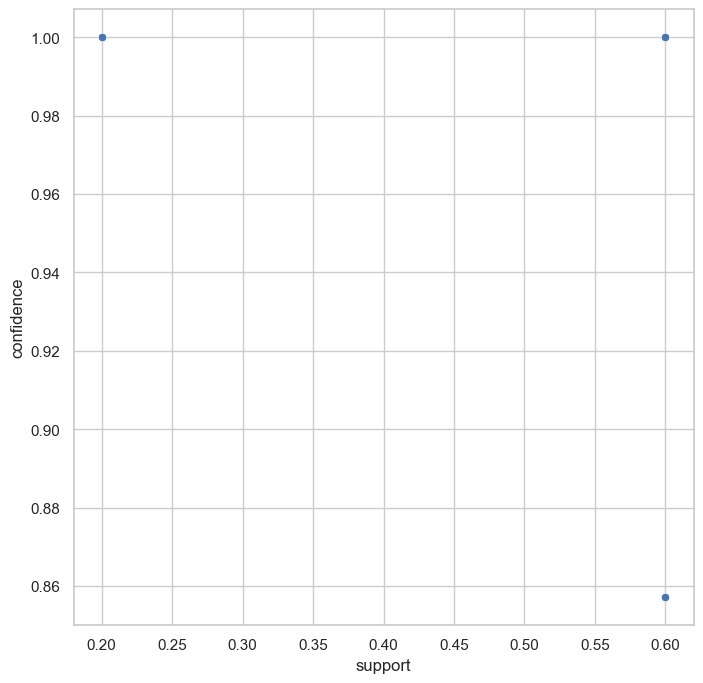

In [27]:
sns.scatterplot(x=model['support'], y=model['confidence'])